In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [84]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [85]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
df = pd.concat([train, test])

In [88]:
df.reset_index(drop=True, inplace=True)

In [89]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<AxesSubplot: xlabel='Survived', ylabel='count'>

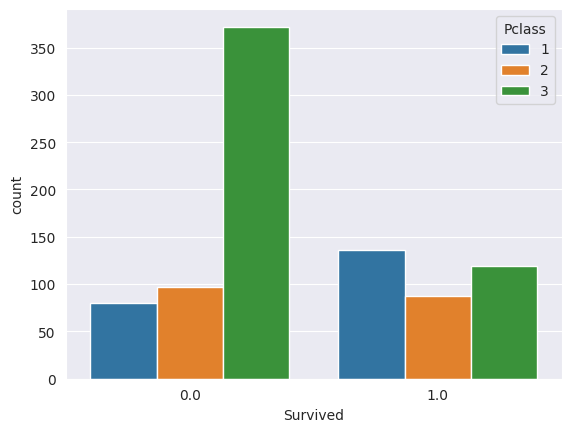

In [90]:
sns.countplot(data=df, x='Survived', hue='Pclass')

<AxesSubplot: xlabel='Survived', ylabel='count'>

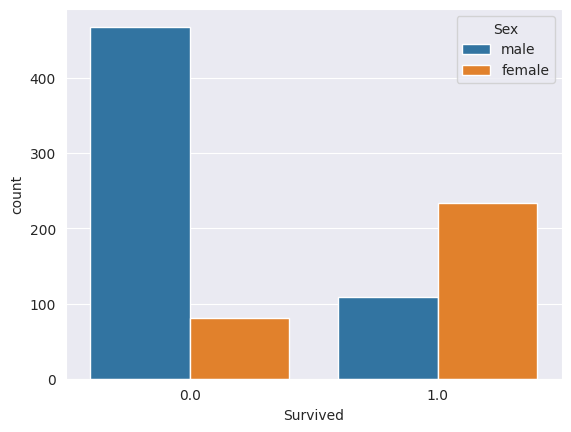

In [91]:
sns.countplot(data=df, x='Survived', hue='Sex')

<AxesSubplot: xlabel='Age', ylabel='Count'>

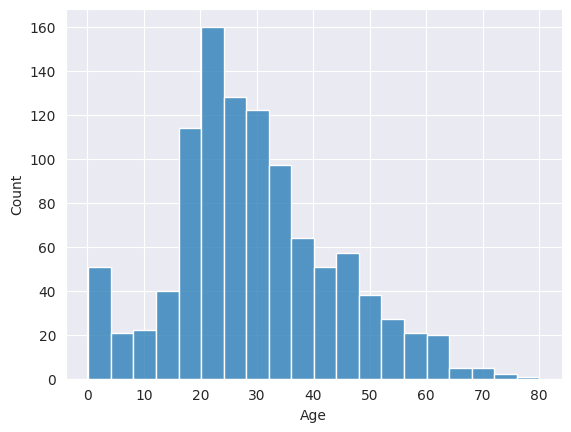

In [92]:
sns.histplot(data=df, x="Age", bins=20)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

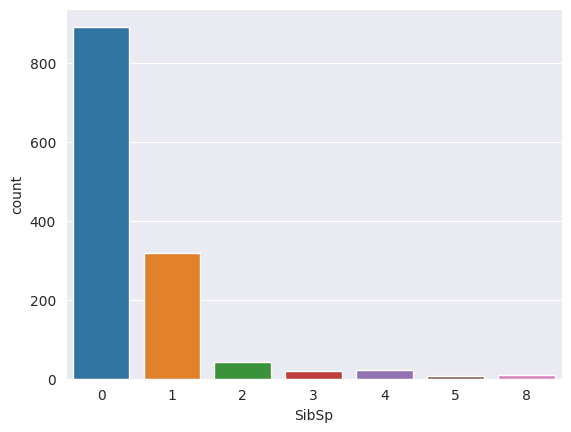

In [93]:
sns.countplot(data=df, x='SibSp')

<AxesSubplot: xlabel='Fare', ylabel='Count'>

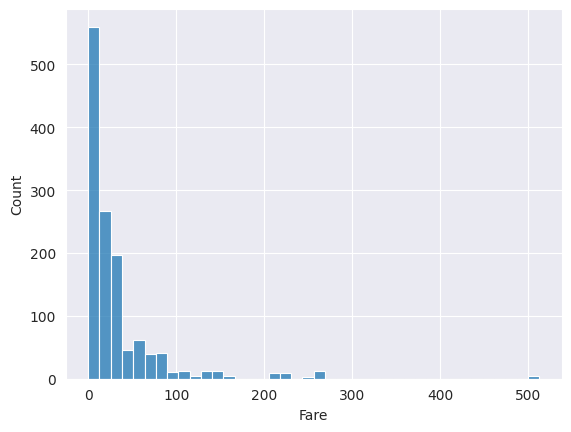

In [94]:
sns.histplot(data=df, x='Fare', bins=40)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

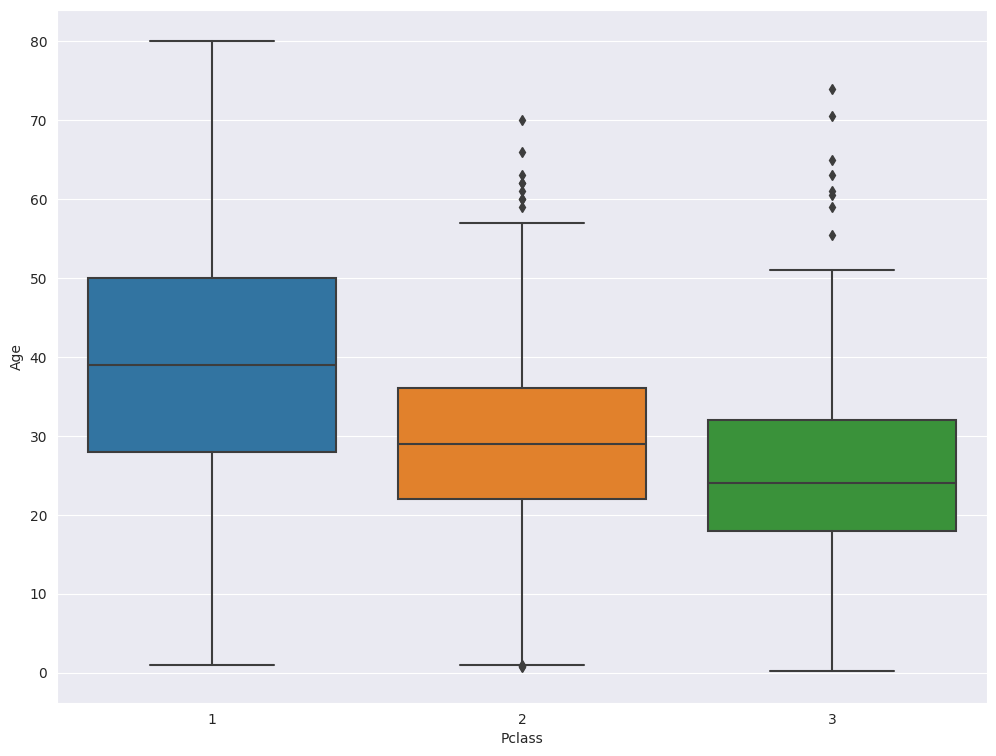

In [95]:
plt.figure(figsize=(12, 9))
sns.boxplot(data=df, x='Pclass', y='Age')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

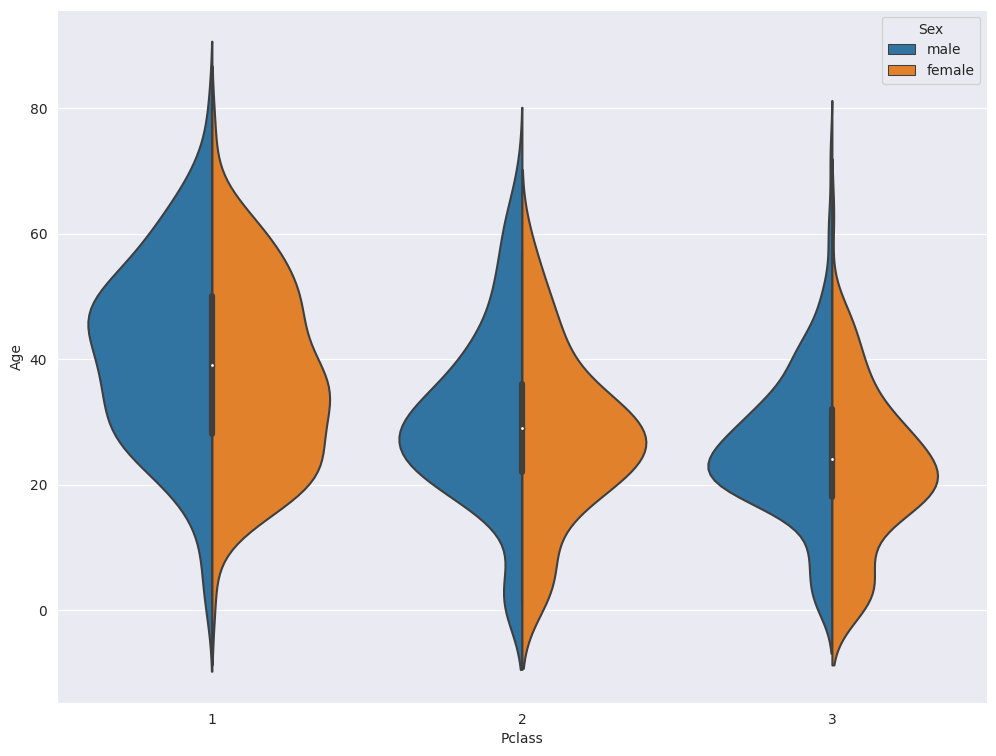

In [96]:
plt.figure(figsize=(12, 9))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Sex', split=True)

In [97]:
df.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [98]:
df.groupby(['Sex', 'Pclass'])['Fare'].median()

Sex     Pclass
female  1         80.92915
        2         23.00000
        3         10.48960
male    1         49.50420
        2         13.00000
        3          7.89580
Name: Fare, dtype: float64

## Imputing missing values

In [99]:
## age - imputing median age grouped by sex and p class
df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

<AxesSubplot: >

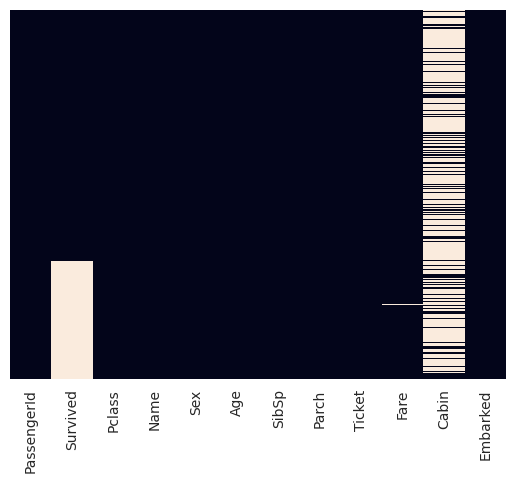

In [100]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [101]:
## filling missing Embarked cells with Embarked mode value

In [102]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [103]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [104]:
df['Embarked'].fillna(value=df['Embarked'].mode()[0], inplace=True)

In [105]:
## we still have missing values from Cabin column, but maybe we can extract some valuable piece of information such as cabin letter

## Feature extraction

In [106]:
df['Cabin']

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [107]:
## maybe we could add some character, and it would symbolize missing cabin letter, I will fill missing data with 'X' character

In [108]:
df['Cabin'] = df['Cabin'].fillna('X')

In [109]:
# Now we can grab just first character from cabin string

In [110]:
df['Cabin_char'] = df.apply(lambda x: str(x['Cabin'])[0], axis=1)

In [111]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_char
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,X
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,X
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,X,S,X
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,X,S,X
1307,1308,NaN,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,X,S,X


In [112]:
## Now we can have a closer look on Name column, and check if we can extract some useful information

In [113]:
df['Name']

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [114]:
## as we can see in each name we have some prefix which could give some kind of social status for avery one of them. Those prefixes have dot symbol at the end

In [115]:
def get_name_prefix(name: str):
    for el in name.split():
        if '.'in el:
            return el

In [116]:
df['Name_prefix'] = df['Name'].apply(get_name_prefix)

In [117]:
df['Name_prefix'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.', 'Dona.'], dtype=object)

In [118]:
## Now we have 17 unique prefixes

## One hot encoding

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_char,Name_prefix
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,X,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,X,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,X,Mr.


In [120]:
dummies = ['Pclass', 'Sex', 'Cabin_char', 'Embarked', 'Name_prefix']

In [121]:
df = pd.get_dummies(df, columns=dummies, drop_first=True)

In [122]:
## dropping unnecessary columns

In [123]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Cabin_char_B',
       'Cabin_char_C', 'Cabin_char_D', 'Cabin_char_E', 'Cabin_char_F',
       'Cabin_char_G', 'Cabin_char_T', 'Cabin_char_X', 'Embarked_Q',
       'Embarked_S', 'Name_prefix_Col.', 'Name_prefix_Countess.',
       'Name_prefix_Don.', 'Name_prefix_Dona.', 'Name_prefix_Dr.',
       'Name_prefix_Jonkheer.', 'Name_prefix_Lady.', 'Name_prefix_Major.',
       'Name_prefix_Master.', 'Name_prefix_Miss.', 'Name_prefix_Mlle.',
       'Name_prefix_Mme.', 'Name_prefix_Mr.', 'Name_prefix_Mrs.',
       'Name_prefix_Ms.', 'Name_prefix_Rev.', 'Name_prefix_Sir.'],
      dtype='object')

In [124]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [125]:
final_df = df.drop(columns=cols_to_drop)

In [126]:
final_df

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_char_B,Cabin_char_C,...,Name_prefix_Major.,Name_prefix_Master.,Name_prefix_Miss.,Name_prefix_Mlle.,Name_prefix_Mme.,Name_prefix_Mr.,Name_prefix_Mrs.,Name_prefix_Ms.,Name_prefix_Rev.,Name_prefix_Sir.
0,0.0,22.0,1,0,7.2500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,38.0,1,0,71.2833,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.0,35.0,0,0,8.0500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,25.0,0,0,8.0500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1305,NaN,39.0,0,0,108.9000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1306,NaN,38.5,0,0,7.2500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1307,NaN,25.0,0,0,8.0500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [130]:
final_df.iloc[:891,:]

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Cabin_char_B,Cabin_char_C,...,Name_prefix_Major.,Name_prefix_Master.,Name_prefix_Miss.,Name_prefix_Mlle.,Name_prefix_Mme.,Name_prefix_Mr.,Name_prefix_Mrs.,Name_prefix_Ms.,Name_prefix_Rev.,Name_prefix_Sir.
0,0.0,22.0,1,0,7.2500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,38.0,1,0,71.2833,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1.0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.0,35.0,1,0,53.1000,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.0,35.0,0,0,8.0500,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,0,0,13.0000,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
887,1.0,19.0,0,0,30.0000,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
888,0.0,22.0,1,2,23.4500,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
889,1.0,26.0,0,0,30.0000,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [132]:
df_train = final_df.iloc[:891,:]
df_test = final_df.iloc[891:,:]

In [149]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']
X_test = df_test.drop('Survived', axis=1)

In [150]:
X_test["Fare"] = X_test["Fare"].fillna(final_df['Fare'].median())

In [134]:
###########

In [152]:
rfc = RandomForestClassifier()

In [153]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [154]:
predictions = rfc.predict(X_test)

In [69]:
confusion_matrix(y_test, predictions)

array([[89, 16],
       [18, 56]])

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [71]:
importances = rfc.feature_importances_

In [72]:
importances_df = pd.DataFrame(importances, X_train.columns, columns=['Importance'])

In [73]:
importances_df

,Importance
Age,0.205946
SibSp,0.053923
Parch,0.034372
Fare,0.214825
Pclass_2,0.019230
Pclass_3,0.047752
Sex_male,0.105775
Cabin_char_B,0.011188
Cabin_char_C,0.007966
Cabin_char_D,0.005469


In [155]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

/home/mardzien/PycharmProjects/DS and ML Bootcamp/venv/lib64/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
predictions

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [157]:
test_df = pd.read_csv('Data/test.csv')

In [158]:
test_df = test_df[['PassengerId']]

In [160]:
test_df = test_df[["PassengerId"]]

In [162]:
output_df = pd.concat([test_df, pd.DataFrame(predictions)], axis=1)

In [164]:
output_df.to_csv('titanic_output.csv', index=False)

In [166]:
output_df.columns = ['PassengerId', 'Survived']

In [167]:
output_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [168]:
output_df['Survived'] = output_df['Survived'].astype('int32')

In [169]:
output_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [170]:
output_df.to_csv('titanic_output.csv', index=False)